# ROC-AUC

```{figure} https://upload.wikimedia.org/wikipedia/commons/3/36/Roc-draft-xkcd-style.svg
:align: center
```

Is a binary classifier predicts the probability $\widehat y \in (0, 1)$ of the positive class, then the predicted label is usually can be obtained as

$$
    \mathbb I[\widehat y > 0.5] = \begin{cases}
        1,& \text{if } \widehat y > 0.5, \\
        0,& \text{if } \widehat y \leqslant 0.5.
    \end{cases}
$$

The value $0.5$ plays a role of **threshold** here, and it can be actually any number $t \in (0, 1)$. How does performance of the classifier depends on $t$?

One popular metric for such cases is **ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve).


The ROC-AUC score quantifies the area under the ROC curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

A couple of additional metrics form the {ref}`confusion matrix <confusion-matrix>`:

**True Positive Rate (TPR)** is the same as recall:

$$
    \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
    
**False Positive Rate (FPR)**:
    
$$
    \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$
 

## Presicion-Recall curve

To build precision-recall curve, do the following steps:

1. Rearrange the predictions in the increasing order:

    $$
        \widehat y_{(1)} \leqslant \widehat y_{(2)} \leqslant \ldots \leqslant \widehat y_{(n)}.
    $$

2. For each threshold

    $$
        t = y_{(n)}, \quad t = y_{(n-1)}, \quad \ldots,\quad t = y_{(1)}, \quad t = 0
    $$

    make label predictions by the formula $\mathbb I[\widehat y_i > t]$ and calculate precision $P_t$ and recall $R_t$ metrics.

3. Connect the points $(R_t, P_t)$ by line segments.

The greater area under the curve — the better.

### A random example

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

def sim_labels_and_probs(size: int):
    probs = np.sort(np.round(np.random.rand(size), 2))
    labels = np.round(np.clip(np.random.normal(loc=probs, scale=1.1, size=size), 0, 1))
    return labels, probs

y_true, y_hat = sim_labels_and_probs(5)
print("True labels:", y_true)
print("Predicted probabilities:", y_hat)
print(average_precision_score(y_true, y_hat))

True labels: [1. 1. 0. 0. 1.]
Predicted probabilities: [0.28 0.49 0.51 0.63 0.94]
0.7


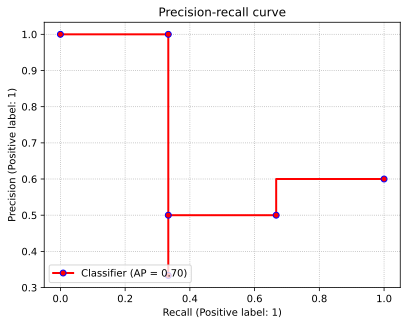

In [83]:
PrecisionRecallDisplay.from_predictions(y_true, y_hat, lw=2, c='r', marker='o', markeredgecolor='b')
%config InlineBackend.figure_format = 'svg'
plt.title("Precision-recall curve")
plt.grid(ls=":");

**Q**. What are the left-most and the right-most points of PR-curve?

## ROC curve

To build precision-recall curve, do the following steps:

1. Rearrange the predictions in the increasing order:

    $$
        \widehat y_{(1)} \leqslant \widehat y_{(2)} \leqslant \ldots \leqslant \widehat y_{(n)}.
    $$

2. For each threshold

    $$
        t = y_{(n)}, \quad t = y_{(n-1)}, \quad \ldots,\quad t = y_{(1)}, \quad t = 0
    $$

    make label predictions by the formula $\mathbb I[\widehat y_i > t]$ and calculate **true positive rate** $TPR_t$ and **false positive rate** $FPR_t$ metrics.

3. Connect the points $(FPR_t, TPR_t)$ by line segments.

The greater area under the curve — the better.

### The same random example

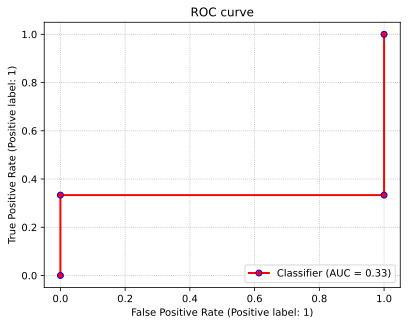

In [84]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_true, y_hat, lw=2, c='r', marker='o', markeredgecolor='b')
plt.title("ROC curve")
plt.grid(ls=":")

**Q**. What are the left-most and the right-most points of ROC-AUC curve?

**Q**. Suppose that ROC-AUC score of a classifier is less than $0.5$. How can we easily improve the performance of this classifier?

## Credit dataset

In [70]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

credit_df = pd.read_csv("../ISLP_datsets/creditcard.csv.zip")
y = credit_df['Class']
X = credit_df.drop("Class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y) 
dc_mf = DummyClassifier(strategy="most_frequent") 
dc_mf.fit(X_train, y_train) 

DummyClassifier(strategy='most_frequent')

Dummy classifier metrics:

In [74]:
print("Train ROC-AUC score:", roc_auc_score(y_train, dc_mf.predict_proba(X_train)[:, 1]))
print("Train AP score:", average_precision_score(y_train, dc_mf.predict_proba(X_train)[:, 1]))
print("Test ROC-AUC score:", roc_auc_score(y_test, dc_mf.predict_proba(X_test)[:, 1]))
print("Test AP score:", average_precision_score(y_test, dc_mf.predict_proba(X_test)[:, 1]))

Train ROC-AUC score: 0.5
Train AP score: 0.0018211184195126519
Test ROC-AUC score: 0.5
Test AP score: 0.0014465885789725008


In [75]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Logistic regression metrics:

In [76]:
print("Train ROC-AUC score:", roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1]))
print("Train AP score:", average_precision_score(y_train, log_reg.predict_proba(X_train)[:, 1]))
print("Test ROC-AUC score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("Test AP score:", average_precision_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

Train ROC-AUC score: 0.9425492263032587
Train AP score: 0.6635935420107146
Test ROC-AUC score: 0.9505265255051857
Test AP score: 0.6253817235944542


Note that ROC-AUC score shows much better performance on an unbalanced dataset than average precision metric.